# The Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings("ignore")

# custom color palette
custom_colors = ["#c8e7ff","#deaaff", "#f72585","#d100d1"]

In [2]:
df = pd.read_csv('Preprocessed data.csv')
df.head()

,"Q1r1 - To begin, what is your age?",QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,...,Q89 - Which of the following is your most frequently used mechanism to get news?_I do not follow the news,Q89 - Which of the following is your most frequently used mechanism to get news?_Magazine,Q89 - Which of the following is your most frequently used mechanism to get news?_News aggregators,Q89 - Which of the following is your most frequently used mechanism to get news?_Online news sites not associated with a traditional news organization,Q89 - Which of the following is your most frequently used mechanism to get news?_Online version of newspapers,Q89 - Which of the following is your most frequently used mechanism to get news?_Print newspapers,Q89 - Which of the following is your most frequently used mechanism to get news?_Radio,Q89 - Which of the following is your most frequently used mechanism to get news?_Social media sites,Q89 - Which of the following is your most frequently used mechanism to get news?_Television news stations,Q89 - Which of the following is your most frequently used mechanism to get news?_Variety/talk shows
0,26.0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,25.0,1,1,1,0,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,28.0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,16.0,1,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,32.0,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0


### Supervised Learning: For understanding the reasons behind customers' interest

In [3]:
target_col = 'Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'

# dropping a column that is extremely correlated with the target column
df.drop(columns="Q26 - Which of the following subscriptions does your household purchase?-Home internet", inplace=True)

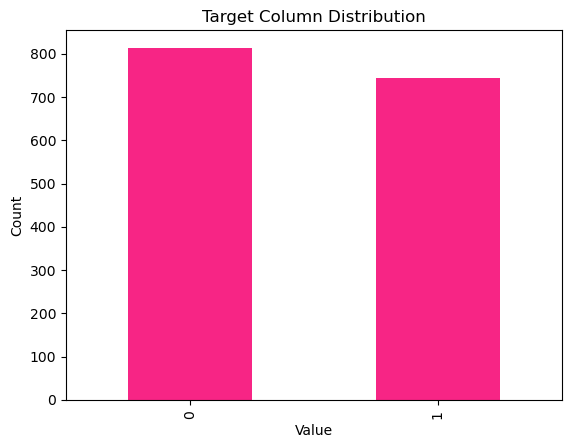

In [4]:
# counting the number of occurrences of each unique value in the target column
counts = df[target_col].value_counts()

# creating a bar plot of the counts
counts.plot(kind='bar', color= custom_colors[2])

# setting the plot title and axis labels
plt.title('Target Column Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [5]:
# training models
def train_model(X, y, model):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    train_accs = []
    test_accs = []
    predicted_targets = np.array([])
    actual_targets = np.array([])

    for fold, (train_index, test_index) in enumerate(kfold.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_acc = accuracy_score(y_train, train_predictions)
        test_acc = accuracy_score(y_test, test_predictions)

        train_accs.append(train_acc)
        test_accs.append(test_acc)

        predicted_targets = np.append(predicted_targets, test_predictions)
        actual_targets = np.append(actual_targets, y_test)

    return train_accs, test_accs, predicted_targets, actual_targets

X = df.drop(target_col, axis=1)
y = df[target_col]

# models to experiment with
models = [
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Bagging Decision Tree", BaggingClassifier(base_estimator=DecisionTreeClassifier())),
    ("Boosted Decision Tree", AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
    ("Random Forest", RandomForestClassifier()),
    ("Voting Classification", VotingClassifier(estimators=[('lr', LogisticRegression()), ('knn', KNeighborsClassifier()), ('svc', SVC()), ('dt', DecisionTreeClassifier()), ('rf', RandomForestClassifier())])),
    ("Neural Network", MLPClassifier())
]

for name, model in models:

    train_accs, test_accs, predicted_targets, actual_targets = train_model(X, y, model)

    # calculating the average accuracy over all folds for each model
    train_avg_acc = np.mean(train_accs)
    test_avg_acc = np.mean(test_accs)

    print("\n" + name +  " Accuracy (Train) across all folds: ", train_avg_acc)
    print( name +  " Accuracy (Test) across all folds: ", test_avg_acc)


Naive Bayes Accuracy (Train) across all folds:  0.7439036351770734
Naive Bayes Accuracy (Test) across all folds:  0.7195461291120455

Logistic Regression Accuracy (Train) across all folds:  0.7036277113225836
Logistic Regression Accuracy (Test) across all folds:  0.6899991755297221

KNN Accuracy (Train) across all folds:  0.7859437931935522
KNN Accuracy (Test) across all folds:  0.7002597081375217

SVM Accuracy (Train) across all folds:  0.5738149085896038
SVM Accuracy (Test) across all folds:  0.5738498639624041

Decision Tree Accuracy (Train) across all folds:  1.0
Decision Tree Accuracy (Test) across all folds:  0.6521395003710115

Bagging Decision Tree Accuracy (Train) across all folds:  0.9841146842309183
Bagging Decision Tree Accuracy (Test) across all folds:  0.7086033473493281

Boosted Decision Tree Accuracy (Train) across all folds:  1.0
Boosted Decision Tree Accuracy (Test) across all folds:  0.6758656937917389

Random Forest Accuracy (Train) across all folds:  1.0
Random Fo

##  Model Results and Evaluation

 After evaluating the accuracy of models on both the training and validation sets, it became apparent that many of the models were overfitting. Therefore, we decided to proceed with further analysis using Logistic Regression.

Precision:  0.6933333333333334
Recall:  0.6290322580645161
F1 score:  0.6596194503171248


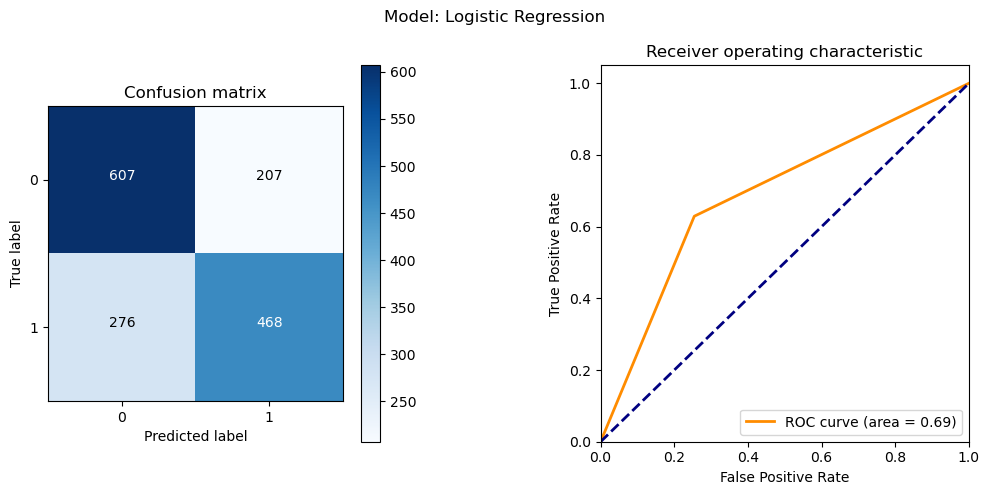

In [6]:
class_names = [0, 1]
train_accs, test_accs, predicted_targets, actual_targets  = train_model(X, y, models[1][1])
cm = confusion_matrix(actual_targets, predicted_targets)

classes = [0,1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plotting confusion matrix
im = ax[0].imshow(cm, cmap=plt.get_cmap('Blues'))
ax[0].set_title("Confusion matrix")
fig.colorbar(im, ax=ax[0])

tick_marks = np.arange(len(classes))
ax[0].set_xticks(tick_marks)
ax[0].set_xticklabels(classes)
ax[0].set_yticks(tick_marks)
ax[0].set_yticklabels(classes)
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')

fmt = 'd'
thresh = cm.max() / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax[0].text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# calculating precision, recall, and F1 score, AUC-ROC score
precision = precision_score(actual_targets, predicted_targets)
recall = recall_score(actual_targets, predicted_targets)
f1 = f1_score(actual_targets, predicted_targets)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

# plotting ROC curve
fpr, tpr, _ = roc_curve(actual_targets, predicted_targets)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver operating characteristic')
ax[1].legend(loc="lower right")

plt.suptitle("Model: Logistic Regression")
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

An ROC area of 0.69 can be considered relatively good or acceptable, since it represents a significant improvement over random guessing (ROC area of 0.5).

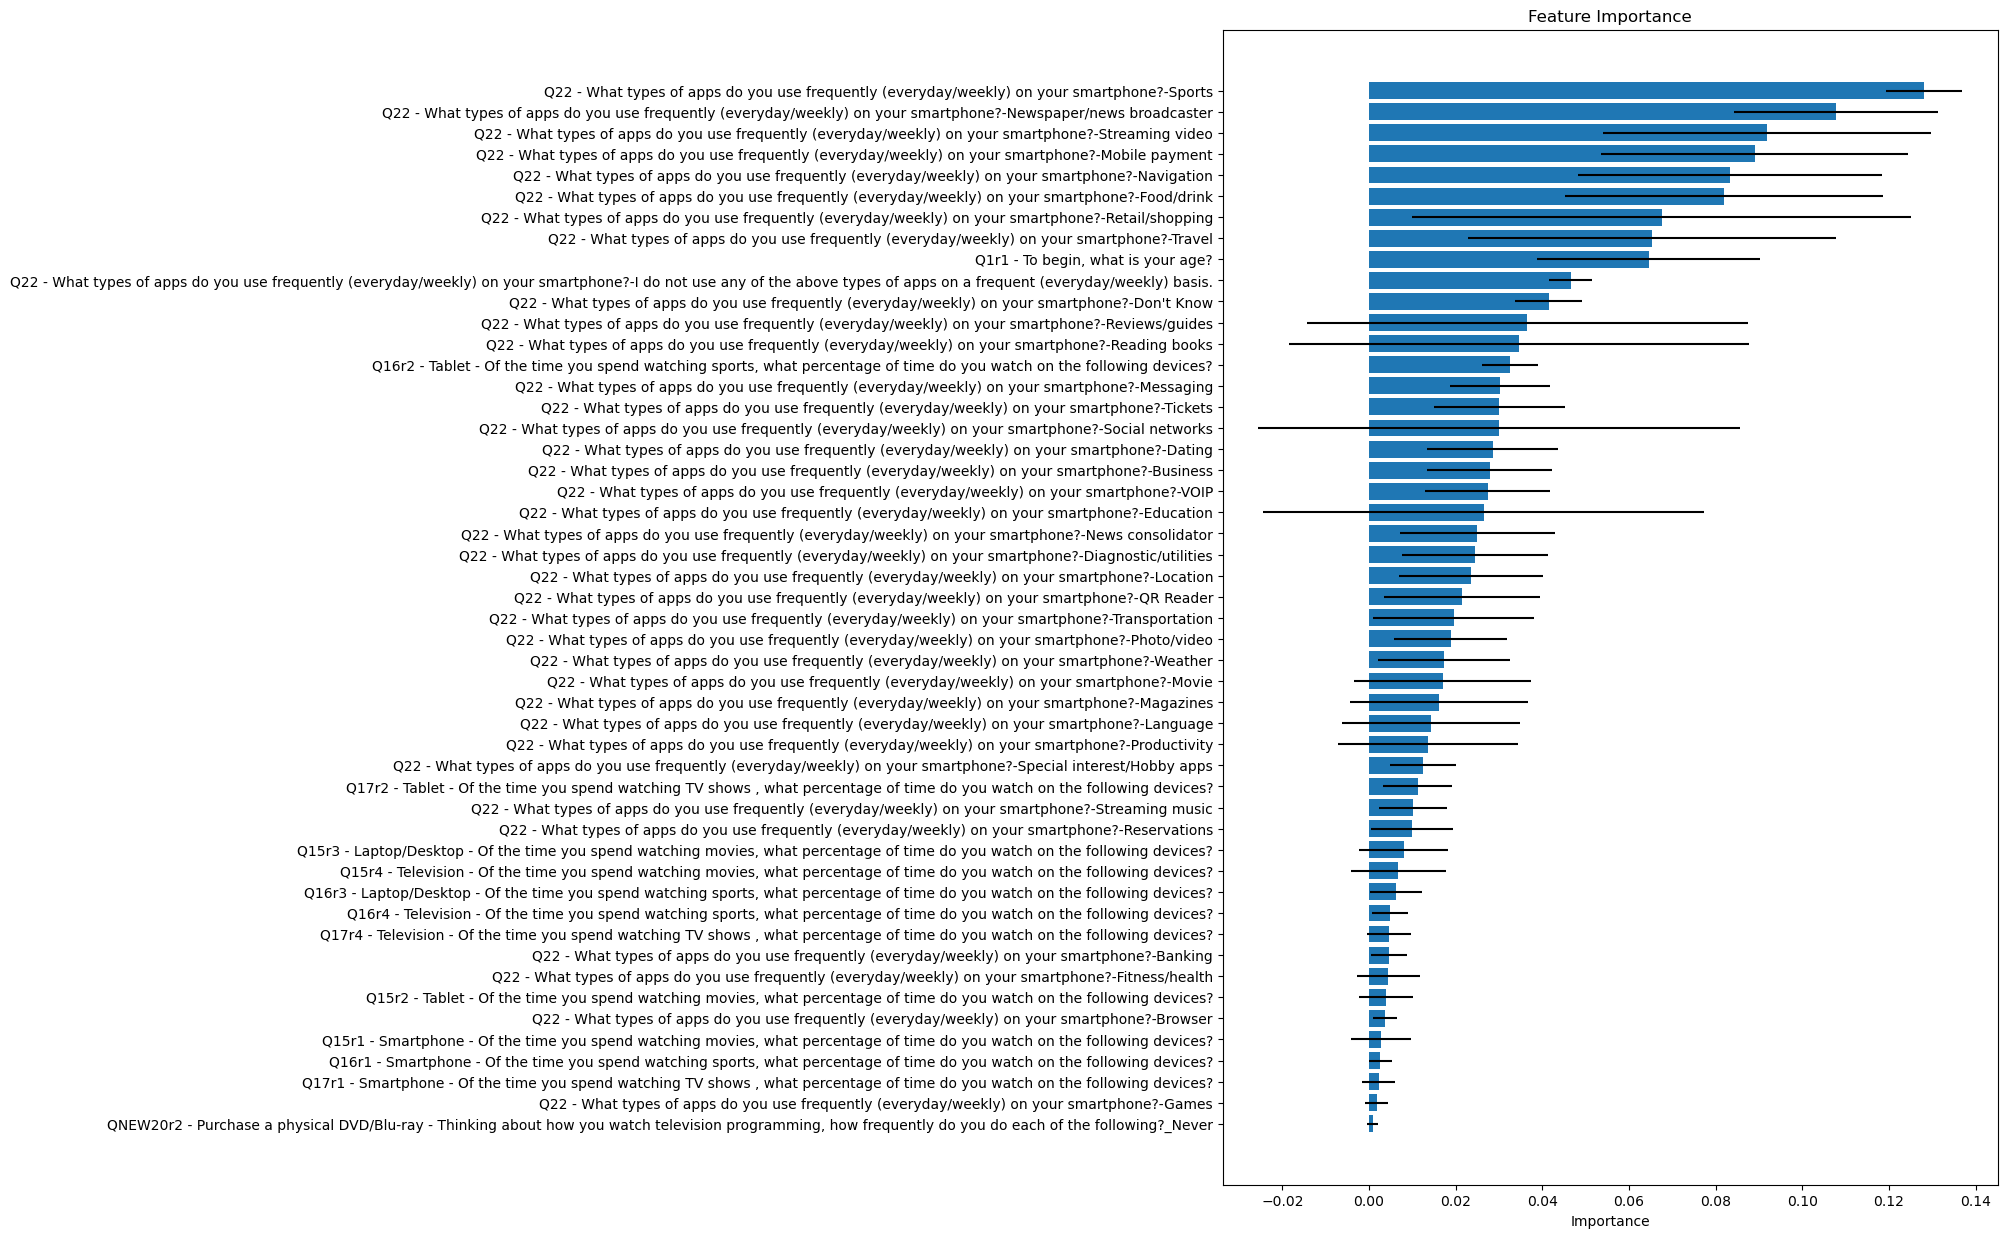

In [7]:
# creating a logistic regression model
lr = LogisticRegression()

# performing k-fold cross-validation with permutation feature importance
cv_results = cross_validate(lr, X, y, cv=5, scoring='accuracy',
                            return_estimator=True, return_train_score=True)

# computing permutation feature importance for each fold
importance_scores = []
for estimator in cv_results['estimator']:
    result = permutation_importance(estimator, X, y, scoring='accuracy',
                                    n_repeats=10, random_state=0)
    importance_scores.append(result.importances_mean)

# aggregating feature importance scores across folds
mean_importance = np.mean(importance_scores, axis=0)
std_importance = np.std(importance_scores, axis=0)

# sorting features by mean importance score
feature_importance = sorted(zip(X.columns, mean_importance, std_importance),
                            key=lambda x: x[1], reverse=True)

# getting feature names and importance scores
features = [f[0] for f in feature_importance[:50]]
importance = [f[1] for f in feature_importance[:50]]
std = [f[2] for f in feature_importance[:50]]

# plotting feature importance as a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,15))
ax.barh(features, importance, xerr=std, align='center')
ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#### Conclusion
It appears that the category of frequently used apps and age are two significant factors that influence customers' willingness to pay for higher internet speeds.

### Unsupervised Learning: For identifying patterns in customer demand

why ? 


    Analyzing the subset of customers who are willing to pay for higher internet speeds can provide valuable insights into the key factors that influence customer behavior in this context.

    By focusing on this specific group, we can obtain a more targeted understanding of the characteristics and preferences of customers.

    This information can be used to inform marketing strategies, as well as to develop targeted product offerings and customer support efforts.



In [8]:
df = df[df != -999].dropna()

# selecting only those customers that are willing to pay
df = df[df[target_col] == 1]

### K-Means

For clustering the data, we implemented K-means algorithm because of its:

    Simplicity and speed: K-Means is a simple and computationally efficient algorithm, making it a popular choice for clustering large datasets. The algorithm has a linear time complexity, which means that it can handle datasets with a large number of features or data points.

    Interpretable results: K-Means produces clusters that are easy to interpret and can be visualized in two or three dimensions. This makes it possible to understand the structure of the data and identify patterns or anomalies.


Dimensionality Reduction using PCA

We chose to perform PCA in order to reduce dimensions of the data and make it suitable for clustering.

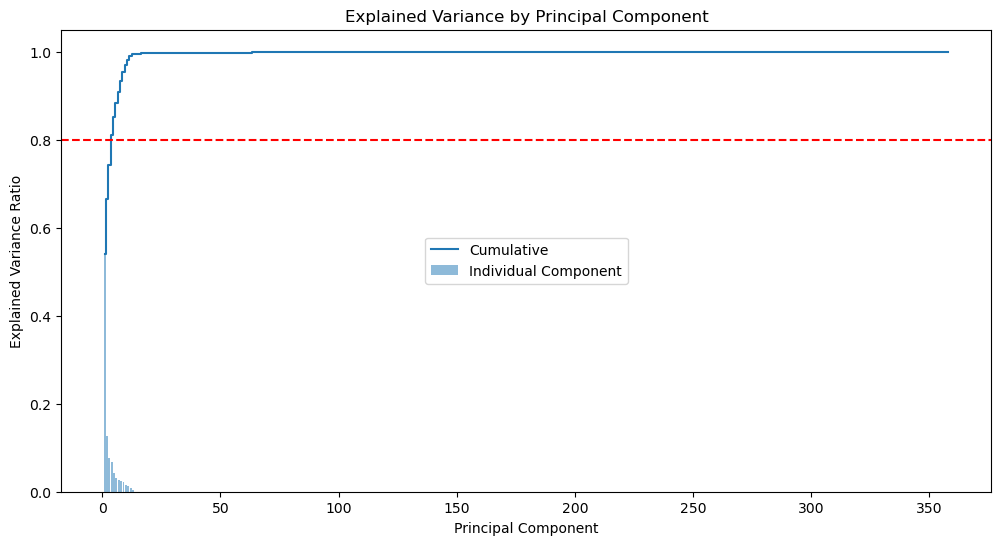

In [9]:
# performing PCA to find optimal number of components 
pca = PCA()
pca.fit(df)

# plotting the explained variance
plt.figure(figsize=(12,6))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Component')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.legend(loc='center')
plt.title('Explained Variance by Principal Component')
plt.show()

Selecting number of components for PCA as 4 as they can explain ~80% of the variance.

In [10]:
# performing PCA with number of components specified
pca = PCA(n_components=4)
pca.fit(df)
pca_scores = pca.transform(df)

 Picking optimal number of clusters using Elbow Method and Silhouette analysis

For n_clusters =  2 , the average silhouette_score is:  0.45641267077473197


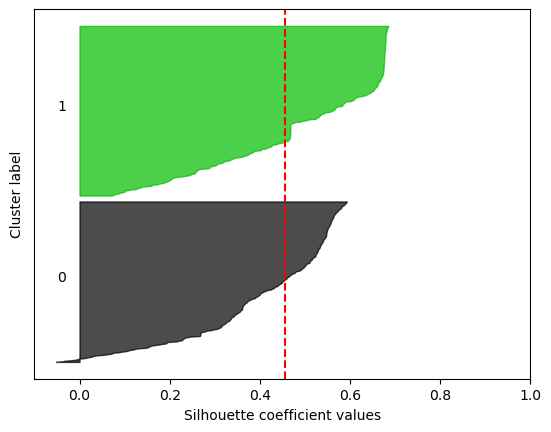

For n_clusters =  3 , the average silhouette_score is:  0.38620356191482275


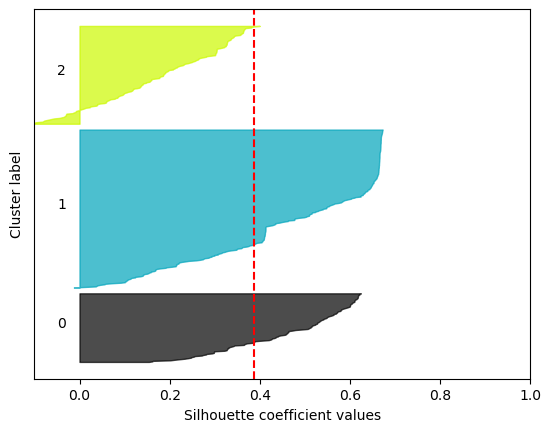

For n_clusters =  4 , the average silhouette_score is:  0.37989862351033094


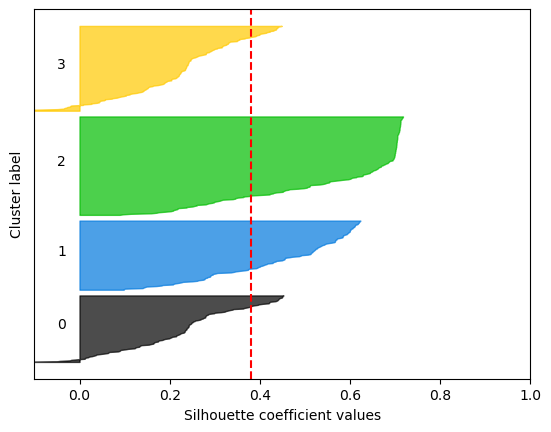

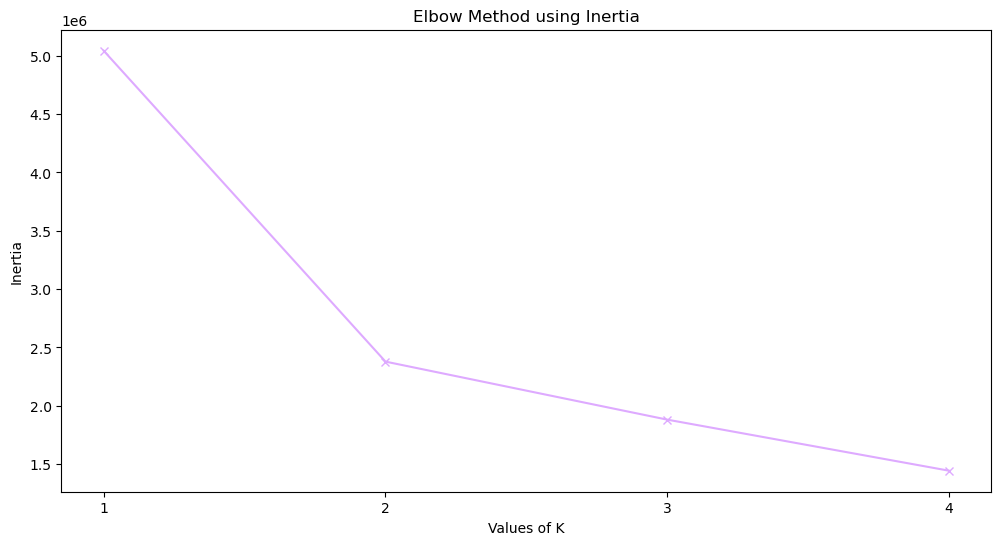

In [11]:
inertias = [] 

for n_clusters in range(1, 5):

    # elbow method
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state= 42)
    kmeans.fit(pca_scores)
    labels = kmeans.labels_ 
    inertias.append(kmeans.inertia_) 

    # silhouette analysis
    if n_clusters!=1:
        # calculating the overall silhouette score
        silhouette_avg = silhouette_score(pca_scores, kmeans.labels_)

        print(
        "For n_clusters = ",
        n_clusters,
        ", the average silhouette_score is: ",
        silhouette_avg)

        # calculating the silhouette scores for each data point
        sample_silhouette_values = silhouette_samples(pca_scores, kmeans.labels_)

        # plotting the silhouette scores as a horizontal bar chart
        fig, ax = plt.subplots()
        y_lower = 10
        for i in range(n_clusters):
            # aggregating the silhouette scores for samples belonging to cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]

            # sorting the silhouette scores for the samples in this cluster
            ith_cluster_silhouette_values.sort()

            # computing the size of the cluster and set the upper y coordinate for this cluster's silhouette plot
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # creating the color map for the cluster
            color = plt.cm.nipy_spectral(float(i) / n_clusters)

            # plotting the silhouette scores for the samples in this cluster
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # labelling the silhouette plot with the cluster number
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # computing the new y_lower for the next plot
            y_lower = y_upper + 10

        # setting the plot parameters
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        # clearing the yaxis labels / ticks
        ax.set_yticks([])  

        ax.set_xlim([-0.1, 1])

        plt.show()

# plotting Elbow method using Inertia
plt.figure(figsize=(12,6))
plt.plot(range(1, 5), inertias, 'bx-',color=custom_colors[1]) 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.xticks(range(1, 5))
plt.title('Elbow Method using Inertia') 
plt.show() 


- Silhouette analysis: Silhouette analysis is a technique used to measure how well each data point fits into its assigned cluster. The optimal number of clusters is the one that maximizes the global silhouette score. In this case it is 2.

- Elbow method: The elbow method is a technique used to determine the optimal number of clusters by looking at the within-cluster sum of squares, also known as inertia, for different values of k. The elbow point represents the optimal number of clusters. In this case it is 2.

Thus as per the results of both Silhouette Analysis and Elbow method using inertia, the optimal value of k is 2.


### K-means clustering with PCA results

In [12]:
# performing k-means with the number of clusters specified as 2
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state= 42)
kmeans.fit(pca_scores)
df['Cluster'] = kmeans.labels_

In [13]:
# combining all the relevant columns
df = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores, columns=[f"PCA{i}" for i in range(1, 5)])], axis=1)
df.head()

,"Q1r1 - To begin, what is your age?",QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,...,Q89 - Which of the following is your most frequently used mechanism to get news?_Print newspapers,Q89 - Which of the following is your most frequently used mechanism to get news?_Radio,Q89 - Which of the following is your most frequently used mechanism to get news?_Social media sites,Q89 - Which of the following is your most frequently used mechanism to get news?_Television news stations,Q89 - Which of the following is your most frequently used mechanism to get news?_Variety/talk shows,Cluster,PCA1,PCA2,PCA3,PCA4
0,26.0,1,0,0,0,1,0,1,0,1,...,1,0,0,0,0,0,-85.816951,-28.884986,-5.810300,8.961265
1,25.0,1,1,1,0,1,0,1,1,1,...,0,0,0,0,0,1,48.065618,-16.407415,-10.933212,28.754872
2,28.0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,86.170830,1.449460,-22.443521,-3.193605
3,32.0,1,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,-101.132579,46.007584,-8.800405,-20.338999
4,38.0,1,0,1,0,0,1,1,1,0,...,1,0,0,0,0,0,-81.708260,-25.514133,16.325493,51.029683


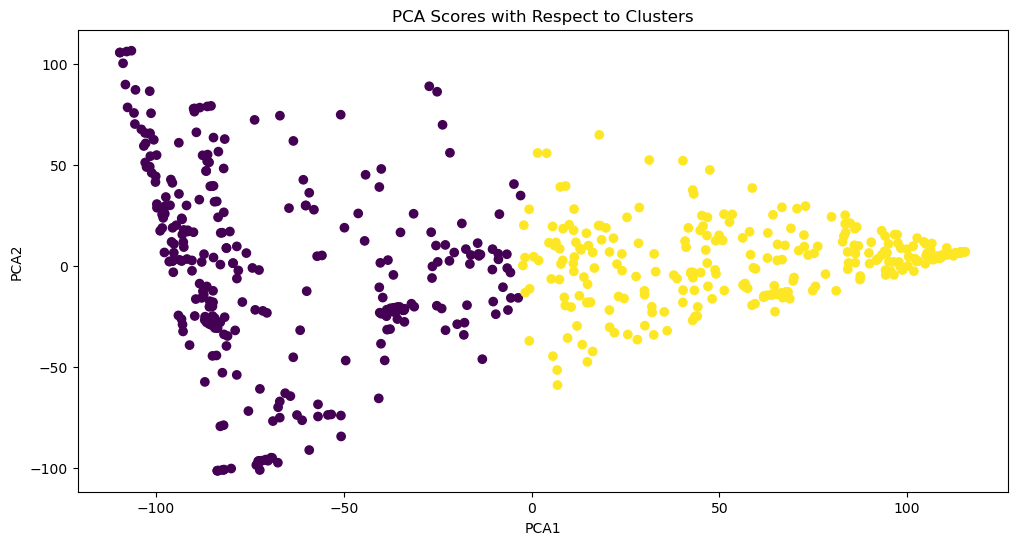

In [14]:
# plotting PCA Scores with Respect to Clusters
plt.figure(figsize=(12,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'])
plt.title('PCA Scores with Respect to Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

to verify the results of clustering, we can analyze a column by cluster.

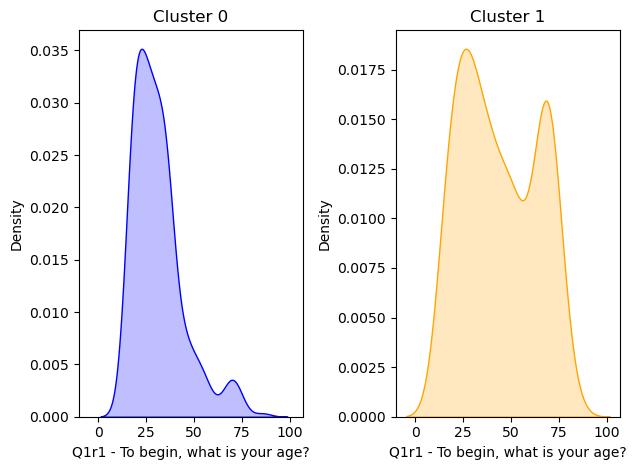

In [15]:
def plot_distribution(col): 
    # creating a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True)

    # plotting the KDE for cluster 0 on the left subplot
    sns.kdeplot(data=df[df['Cluster']==0], x=col, ax=ax1, color='blue', fill=True)

    # plotting the KDE for cluster 1 on the right subplot
    sns.kdeplot(data=df[df['Cluster']==1], x=col, ax=ax2, color='orange', fill=True)

    # setting the labels for the plots
    ax1.set_xlabel(col)
    ax2.set_xlabel(col)
    ax1.set_ylabel('Density')
    ax2.set_ylabel('Density')
    ax1.set_title('Cluster 0')
    ax2.set_title('Cluster 1')

    plt.tight_layout()
    plt.show()

plot_distribution('Q1r1 - To begin, what is your age?')

We have mostly younger people in cluster 0 as opposed to cluster 1 which has a more distributed age range

### Inspecting the distinguishing factors between clusters

We used a Random Forest classifier trained on cluster labels to identify the distinguishing features between clusters.

This involved selecting the most informative features using the Random Forest algorithm and analyzing their importance scores for each cluster. By examining these features, we were able to gain insights into the key factors that differentiate the clusters and better understand their unique characteristics and behaviors.


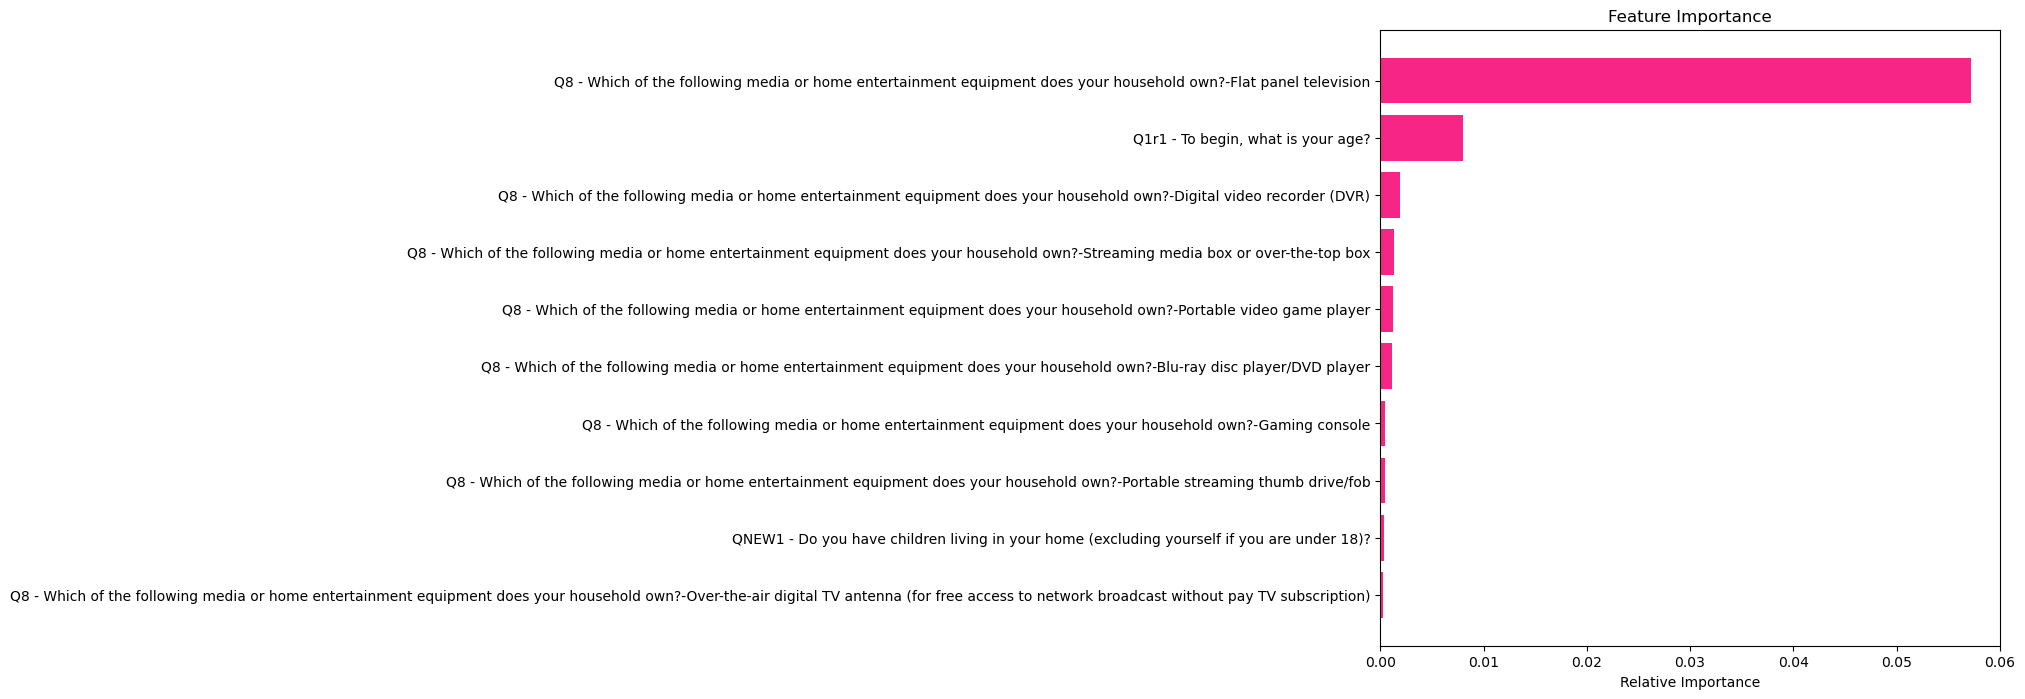

In [16]:
# train random forest classifier on cluster labels
clf = RandomForestClassifier(random_state=1)
X = df.drop('Cluster', axis=1)
y = df['Cluster']
clf.fit(X.values, y.values)

# plot feature importance
def feature_importance(model):
    plt.figure(figsize=(8,8))
    importances = model.feature_importances_[:10]
    indices = np.argsort(importances)[:10]
    features = X.columns
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color=custom_colors[2], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

feature_importance(clf)

 Owning a certain media or home entertainment equipment and age seem to be the factors that distinguish clusters.

## Agglomerative Clustering

For clustering the data, we implemented Agglomerative clustering because of its:

    Flexibility: Agglomerative clustering allows us to choose from a variety of linkage methods, which specify how to measure the distance between clusters. This makes the algorithm more flexible than K-Means, which uses a fixed distance metric.

    No need to specify the number of clusters in advance: Unlike K-Means, which requires us to specify the number of clusters in advance, agglomerative clustering builds a hierarchy of clusters that can be cut at any level to obtain the desired number of clusters. This makes it easier to explore different clustering solutions and find the best fit for the data.

    Ability to capture non-convex clusters Agglomerative clustering can capture non-convex clusters, which K-Means is not well-suited to handle. This makes it a good choice for datasets with complex or irregularly-shaped clusters.


In [17]:
df = df.drop('Cluster', axis=1)

### Using Dendrograms to Determine Optimal Number of Clusters

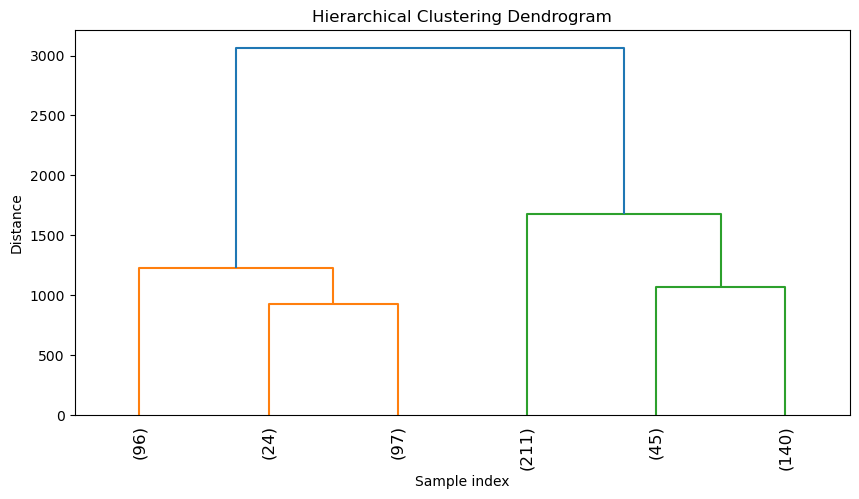

In [18]:
# performing hierarchical clustering using Ward linkage
Z = linkage(df, method='ward')

# plotting dendrogram with truncated branches
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dn = dendrogram(
    Z,
    truncate_mode='lastp',
    p=6,  # specify the number of clusters to display
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

Since the dendrogram has two clusters at the top, it means that the hierarchical clustering algorithm has grouped all the data points into two main clusters. Each of these clusters may further have sub-clusters, but at the highest level, the algorithm has identified two distinct groups within the data.

The distance between the two clusters at the top represents the dissimilarity between the two groups. The shorter the distance, the more similar the clusters are to each other. The height of the dendrogram also indicates the level of dissimilarity between the clusters. A taller dendrogram means that there is greater dissimilarity between the clusters, while a shorter dendrogram means that the clusters are more similar

###  Agglomerative Clustering

In [19]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)
df['Cluster'] = cluster.labels_

df['Cluster'].replace(1, 3, inplace=True)
df['Cluster'].replace(0, 4, inplace=True)
df['Cluster'].replace(3, 0, inplace=True)
df['Cluster'].replace(4, 1, inplace=True)

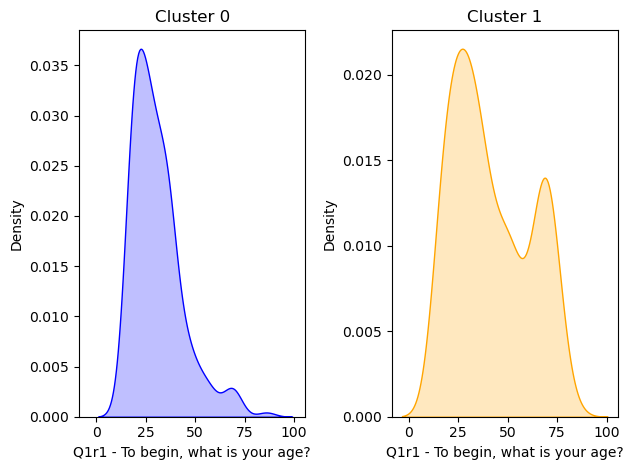

In [20]:
plot_distribution('Q1r1 - To begin, what is your age?')

 Inspecting the distinguishing factors between clusters



We used a Random Forest classifier trained on cluster labels to identify the distinguishing features between clusters.

This involved selecting the most informative features using the Random Forest algorithm and analyzing their importance scores for each cluster. By examining these features, we were able to gain insights into the key factors that differentiate the clusters and better understand their unique characteristics and behaviors.


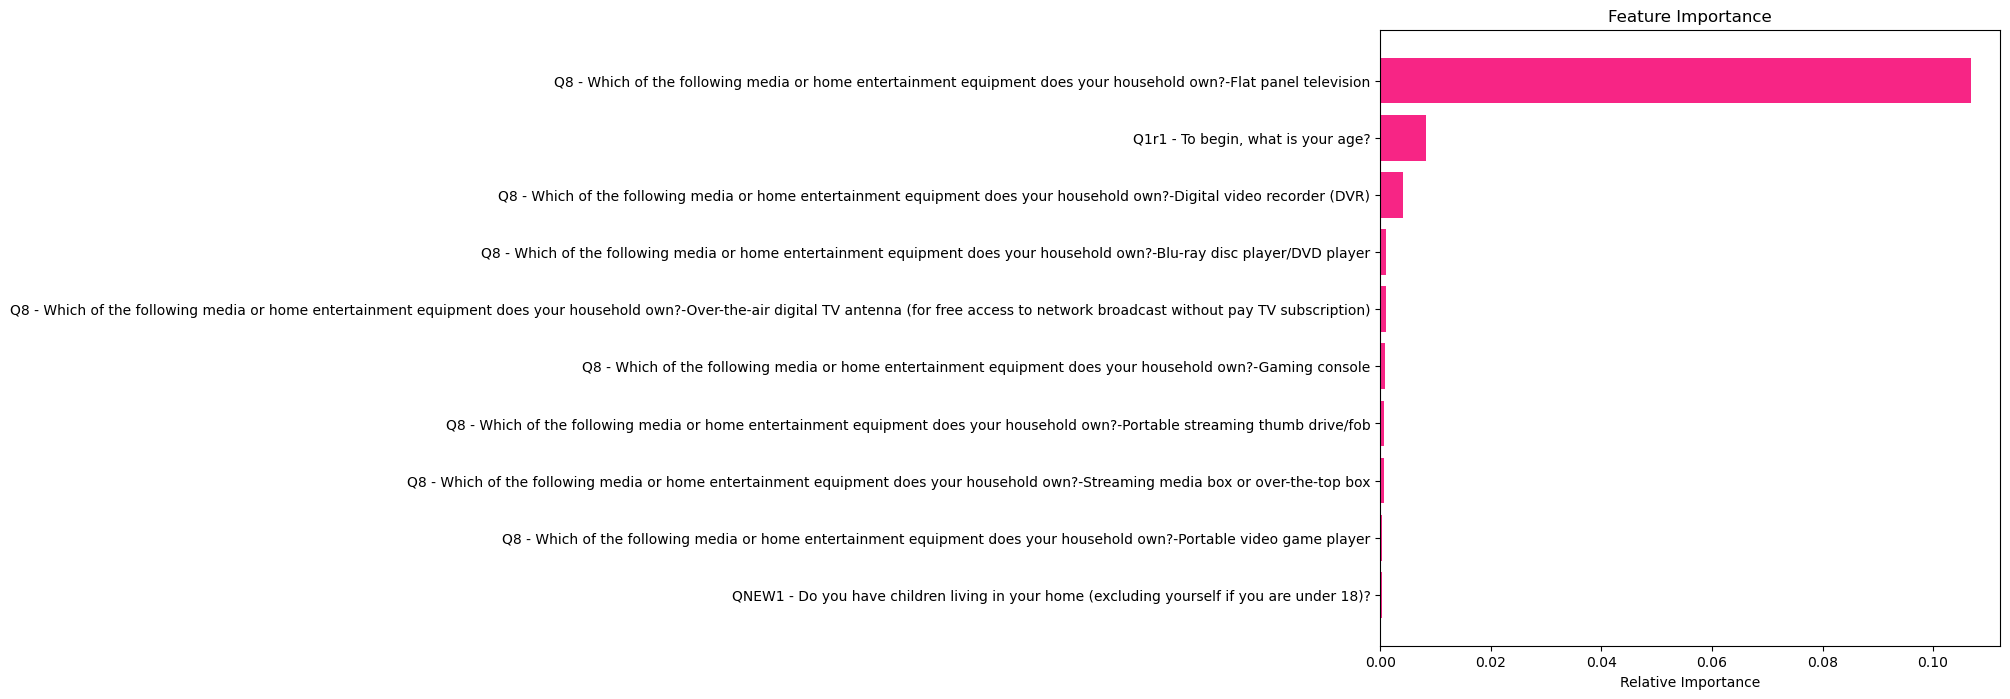

In [21]:
# train random forest classifier on cluster labels
clf = RandomForestClassifier(random_state=1)
X = df.drop('Cluster', axis=1)
y = df['Cluster']
clf.fit(X.values, y.values)

# plot feature importance
def feature_importance(model):
    plt.figure(figsize=(8,8))
    importances = model.feature_importances_[:10]
    indices = np.argsort(importances)[:10]
    features = X.columns
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color=custom_colors[2], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

feature_importance(clf)

## Conclusion : 
The fact that both K-means and Agglomerative clustering algorithms produced the same number of clusters and identified similar distinguishing columns for clusters indicates that the underlying structure of the data is well-defined and stable. This provides greater confidence in the results and suggests that the identified clusters are meaningful and robust.

The similarity in the distinguishing columns for each cluster provides insights into the segmentation of the customer base and can inform marketing and business strategies. We will be able to tailor our marketing campaigns based on the preferences and demographics of each cluster to improve customer engagement and satisfaction.

To make the best recommendation we will see the top resulst of our linear regression ( refear to the graph of Cohort_Media_Behavior in the same directory to understand the recommandation):

- App use one smartphone

The top 3 best plot are : Social Networs , Streaming Music and Games : 
Making a customized with on of this App can  be a good way to improve the sell ratio

- Time spent Watching shows and movie on Tablet 

We can see the time is kinda long , so we can suggest an offer with the Video platform ( as  memberships )

- Region :

The observation is in America , and we can see the Southern States is the more inffluenced by our business

- Age and Employement

The customer are young adlts ( 16 - 40) and full time / part time ( they got income) , the advertising and offer should be axed on that

- Income

The middle class ( 50-99k year) is more engaged , so the price of our offer might be adapted to that budget

- Time spent watching Sport on Laptop

we can see some activites during Sport events as NBA Finals , super bowl ect

## To make short : 

- Collaborations : with entertainement compagnies to offer customized internet bundle services
- Business expansion : South States
- Target : Youg adults emplyed from the middle class
- Seasonnal offer : Around big events ( as sport)